In [19]:
"""
Notebook to train a multiclass clasification algorithm on the reuters newswire dataset
"""

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [8]:
## Vectorize the data

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [18]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 114us/step - loss: 2.7120 - acc: 0.5220 - val_loss: 1.8001 - val_acc: 0.6300
Epoch 2/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.4654 - acc: 0.7006 - val_loss: 1.3259 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0862 - acc: 0.7671 - val_loss: 1.1528 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.8568 - acc: 0.8136 - val_loss: 1.0330 - val_acc: 0.7780
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.6873 - acc: 0.8535 - val_loss: 0.9661 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.5450 - acc: 0.8859 - val_loss: 0.9206 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.4375 - acc: 0.9094 - val_loss: 0.9142 - val_acc: 0.8000
Epoch

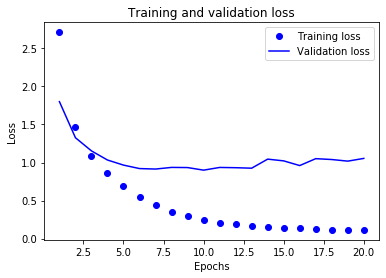

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

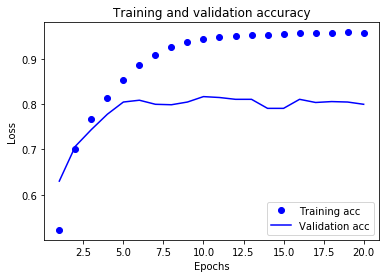

In [21]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
## New NN to prevent overfitting

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 115us/step - loss: 2.6932 - acc: 0.5355 - val_loss: 1.7655 - val_acc: 0.6380
Epoch 2/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.4071 - acc: 0.7111 - val_loss: 1.3075 - val_acc: 0.7120
Epoch 3/9
7982/7982 [==============================] - 1s 74us/step - loss: 1.0371 - acc: 0.7762 - val_loss: 1.1531 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.8193 - acc: 0.8217 - val_loss: 1.0477 - val_acc: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.6510 - acc: 0.8603 - val_loss: 0.9642 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.5153 - acc: 0.8903 - val_loss: 0.9123 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.4124 - acc: 0.9126 - val_loss: 0.9371 - val_acc: 0.7990
Epoch 8/9
798

In [25]:
predictions = model.predict(x_test)

In [28]:
np.argmax(predictions[0])

3